#### 확률적 경사하강법 SGD
''''''
모델의 오차(비용) 를 최소하는 파라메터(가중치)를 찾기위한 최적화 방법
현재위치 : 모델의 현재 파라메터
산의 높이: 모델의 오차
기울기 : 반대방향으로 가야 가장 빠르게 낮아진다

배치경사 하강법 : 산 전체의 지형을 모두 조사해서 가장 가파른 방향을 찾아 한걸음씩 내려가는 구조
(한번에 전체 데이터를 다 쓴다)
장점 : 기울기 계산이 매우 정확
단점 : 데이터가 많으면 매우느리고 리소스를 많이 사용

확률적 경사하강법 : 무작위로 한 지점만 보고 그곳의 경사를 따라서 내려간다
SGD 는 무작위로 샘플 한개의 오차를 계산하고 파라메터를 업데이트 이 과정을 모든 데이터에 대해서 
빠르게 반복
무작위성의 장점 : 지역최저점(local minimum)에 갇히지 않고 더 낮은 전역 최저점(global minimum)
''''''

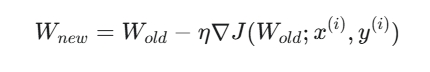

'''
w-new : 새로운 가중치
w-old : 현재 가중치
n(에타) : 학습률 learning rate (사람으로 치면 보폭 / 너무 크면 최적점을 지나고 너무 작으면 학습이 매우 느려짐)
나블라 : 기울기 Gradiant
J : 오차함수(비용함수) - 현재 가중치 w-old에서 하나의 데이터 샘플에 대한 오차

새로운 가중치 = 현재 가중치 오차를 키우는 기울기방향과 반대로 학습률 만큼 이동한 값
'''


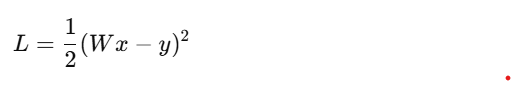

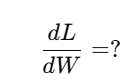

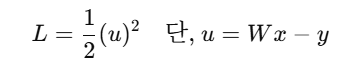

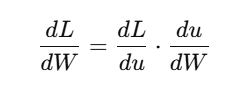

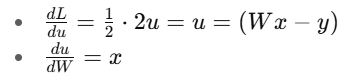

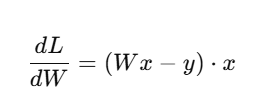

In [5]:
# y = Wx
# 비용함수 오차 (Wx - y)**2 / 2  ---> 얘를 미분 : (Wx-y)*x (W를 변수로 두고 합성함수 미분 이용)
# 공부시간 x , 시험점수 y
# (3,7) / W-old = 1.0 / 학습률 n=0.1
# y-pred = 1.0 x 3
# 기울기 계산 (3.0 - 7) x 3 = -12.0
1.0 - (0.1)


0.9

epoch : 1  loss : 10.4196       w : 0.8140  b:-0.7694
epoch : 11  loss : 2.0429       w : 1.8503  b:0.1118
epoch : 21  loss : 1.1354       w : 2.1804  b:0.4224
epoch : 31  loss : 1.0412       w : 2.2748  b:0.5374
epoch : 41  loss : 1.0324       w : 2.2845  b:0.5760
epoch : 51  loss : 1.0300       w : 2.2757  b:0.5966
epoch : 61  loss : 1.0277       w : 2.2865  b:0.6210
epoch : 71  loss : 1.0265       w : 2.2799  b:0.6409
epoch : 81  loss : 1.0258       w : 2.2743  b:0.6633
epoch : 91  loss : 1.0260       w : 2.2746  b:0.6740


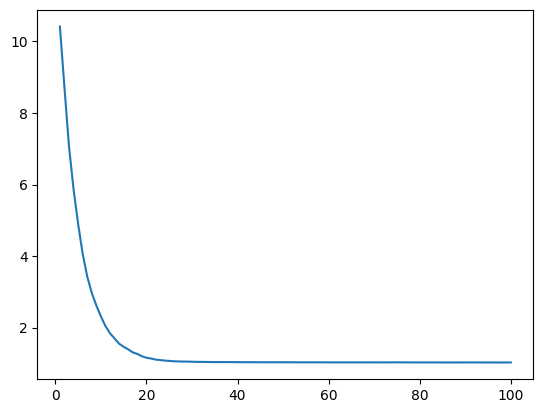

In [6]:
# learning rate  학습률 - 기울기의 방향으로 다음 가중치 업데이트 양
# epoch  # 몇번 학습
import numpy as np
import matplotlib.pyplot as plt

# 샘플데이터  y = 2x + 1
X = 2*np.random.rand(100,1)
y = 2*X + 1 +  np.random.randn(100,1)  # 약간의 노이즈 추가

# SGD를 위한 초기값 셋팅
w = np.random.randn(1,1)  # 가중치(기울기)
b = np.random.randn(1,1)  # y 절편
learning_rate = 0.0005
n_epochs = 100
history = []  # 학습현황 기록
loss = []
# 학습반복
for epoch in range(n_epochs):
  # epoch마다 데이터 샘플 하나씩 학습
  for i in range(len(X)):
    random_idx = np.random.randint(len(X))
    xi = X[random_idx:random_idx+1]
    yi = y[random_idx:random_idx+1]
    # 예측  y-pred = Wx + b
    y_pred = xi.dot(w) + b

    # 오차 계산
    error = y_pred - yi

    # 수식적용 : 기울기 계산
    gradient_w =  xi.T.dot(error)
    gradient_b =  np.sum(error)

    # 수식적용 : 가중치와 편향 업데이트
    w = w - learning_rate*gradient_w
    b = b - learning_rate*gradient_b
    history.append( ( w.copy()[0,0], b.copy()[0,0] )  )  # 시각화를 위해서 저장

# epoch 단위로 결과 출력
  total_loss = np.mean( (X.dot(w) + b - y)**2 )
  loss.append(total_loss)
  if epoch % 10 == 0:
    print(f'epoch : {epoch+1}  loss : {total_loss:.4f} \
      w : {w[0,0]:.4f}  b:{b[0,0]:.4f}')


plt.plot(range(1,n_epochs+1),loss )

In [7]:
#SGD
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X,y)   

c:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [8]:
sgd.predict(X)[:5], y[:5], sgd.intercept_ ,sgd.coef_

(array([2.2717218 , 1.55350578, 1.43245882, 3.45432004, 4.08417091]),
 array([[2.02780123],
        [0.57746718],
        [0.26364882],
        [1.49647731],
        [3.44210302]]),
 array([1.20084686]),
 array([1.80770671]))

In [9]:
print(w, b)
predict = w*X + b
predict[:5]

[[2.2322457]] [[0.65864778]]


array([[1.98101715],
       [1.09412846],
       [0.94465369],
       [3.44134797],
       [4.21911898]])

In [10]:
%pip install Pillow

Note: you may need to restart the kernel to use updated packages.


--- SGD 학습 시작 ---
Epoch  1 | Loss: 0.9538 | W: 1.4792, b: 1.8316
Epoch  2 | Loss: 0.8693 | W: 1.4159, b: 1.4113
Epoch  3 | Loss: 0.8347 | W: 1.6117, b: 1.2250
Epoch  4 | Loss: 0.8092 | W: 1.8373, b: 1.1190
Epoch  5 | Loss: 0.8202 | W: 1.7932, b: 1.0777
Epoch  6 | Loss: 0.8368 | W: 1.8656, b: 1.2897
Epoch  7 | Loss: 0.8171 | W: 1.8519, b: 1.0476
Epoch  8 | Loss: 0.8328 | W: 1.5885, b: 1.2651
Epoch  9 | Loss: 0.8323 | W: 1.6837, b: 1.4483
Epoch 10 | Loss: 0.8313 | W: 1.5510, b: 1.3325

--- SGD 학습 완료 ---
최종 W: 1.5510 (정답: 2.0)
최종 b: 1.3325 (정답: 1.0)


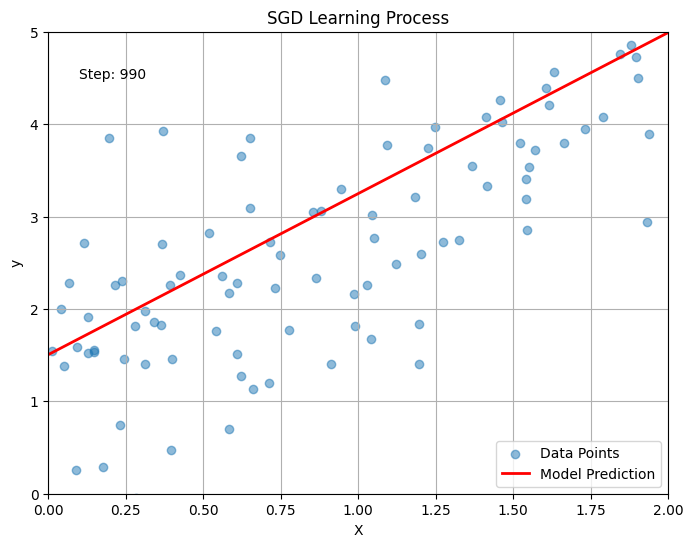

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# 1. 샘플 데이터 생성 (정답: y = 2x + 1)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1) # 약간의 노이즈 추가

# 2. SGD 적용을 위한 초기값 설정
W = np.random.randn(1, 1) # 가중치 (기울기)
b = np.random.randn(1, 1) # 편향 (y절편)
learning_rate = 0.05
n_epochs = 10

# 학습 과정을 기록할 리스트
history = []

# 3. 정답을 찾아가는 과정 반복 묘사
print("--- SGD 학습 시작 ---")
for epoch in range(n_epochs):
    # 매 Epoch마다 데이터 샘플 하나씩 학습
    for i in range(len(X)):
        # 랜덤하게 하나의 샘플 선택
        random_index = np.random.randint(len(X))
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        # 예측 (y_pred = W*x + b)
        y_pred = xi.dot(W) + b

        # 오차 계산
        error = y_pred - yi

        # 수식 적용: 기울기 계산
        gradient_W = xi.T.dot(error)
        gradient_b = np.sum(error)

        # 수식 적용: 가중치와 편향 업데이트
        W = W - learning_rate * gradient_W
        b = b - learning_rate * gradient_b

        # 시각화를 위해 10번의 업데이트마다 기록
        if i % 10 == 0:
            history.append((W.copy()[0,0], b.copy()[0,0]))

    # Epoch마다 결과 출력
    total_loss = np.mean((X.dot(W) + b - y)**2)
    print(f"Epoch {epoch+1:2d} | Loss: {total_loss:.4f} | W: {W[0,0]:.4f}, b: {b[0,0]:.4f}")

print("\n--- SGD 학습 완료 ---")
print(f"최종 W: {W[0,0]:.4f} (정답: 2.0)")
print(f"최종 b: {b[0,0]:.4f} (정답: 1.0)")


# 4. 학습 과정 시각화 (애니메이션)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, alpha=0.5, label='Data Points')
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_title("SGD Learning Process")
ax.grid(True)
ax.set_xlim(0, 2)
ax.set_ylim(0, 5)

X_line = np.array([[0], [2]])
line, = ax.plot([], [], 'r-', lw=2, label='Model Prediction')
epoch_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
ax.legend()

def update(frame):
    W_val, b_val = history[frame]
    y_line = X_line * W_val + b_val
    line.set_data(X_line, y_line)
    epoch_text.set_text(f'Step: {frame*10}')
    return line, epoch_text

# 애니메이션 생성
ani = FuncAnimation(fig, update, frames=len(history), blit=True, interval=50)

# GIF로 저장 (Pillow가 설치되어 있어야 합니다: pip install Pillow)
ani.save('sgd_learning.gif', writer=PillowWriter(fps=10))

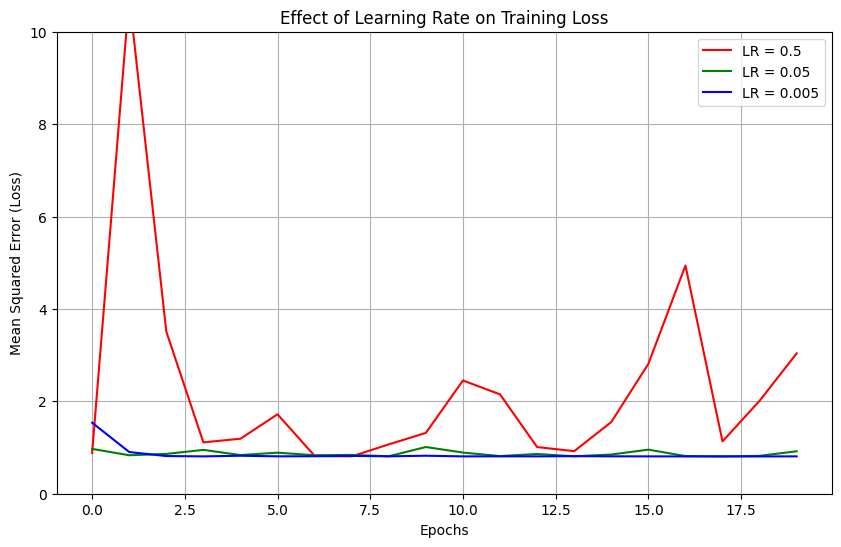

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 샘플 데이터 생성 (정답: y = 2x + 1)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1)

# 2. 비교할 학습률 리스트
learning_rates = [0.5, 0.05, 0.005]
colors = ['red', 'green', 'blue']
n_epochs = 20

plt.figure(figsize=(10, 6))

# 3. 각 학습률에 대해 SGD 학습 반복
for lr, color in zip(learning_rates, colors):
    W = np.random.randn(1, 1)
    b = np.random.randn(1, 1)
    loss_history = []

    for epoch in range(n_epochs):
        # 매 Epoch마다 데이터 샘플 하나씩 학습
        for i in range(len(X)):
            random_index = np.random.randint(len(X))
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            y_pred = xi.dot(W) + b
            error = y_pred - yi
            gradient_W = xi.T.dot(error)
            gradient_b = np.sum(error)

            W = W - lr * gradient_W
            b = b - lr * gradient_b

        # Epoch별 손실(loss) 계산 및 기록
        total_loss = np.mean((X.dot(W) + b - y)**2)
        loss_history.append(total_loss)

    # 4. 결과 시각화
    plt.plot(range(n_epochs), loss_history, color=color, label=f'LR = {lr}')

plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Effect of Learning Rate on Training Loss")
plt.legend()
plt.grid(True)
plt.ylim(0, 10) # y축 범위를 고정하여 비교 용이하게 함
plt.show()
     